In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

species = 'mansoni-lowAdultBurden'

case = [None]*(5)
label = [None]*(5)
label1line = [None]*(5)
df = np.zeros((511,26,len(case)))
eggCounts = np.zeros((511,200,len(case)))
wormCounts = np.zeros((511,200,len(case)))
params = [None]*len(case)

label[0] = 'PZQ,\nideal MDA'
label1line[0] = 'PZQ, ideal MDA'
label[1] = 'Ideal drug,\nannual MDA'
label1line[1] = 'Ideal drug, annual MDA'
label[2] = 'Ideal drug,\n40% coverage'
label1line[2] = 'Ideal drug, 40% coverage'
label[3] = 'Ideal drug,\n5% NT'
label1line[3] = 'Ideal drug, 5% NT'
label[4] = 'Ideal drug,\nideal MDA'
label1line[4] = 'Ideal drug, ideal MDA'

case[0] = species+'-70prev-0NT-2pyr-86efficacy-75com-baseline'
df[:,:,0] = pd.read_json('NewResults/' + case[0] + '_df_results.json')
df1 = pd.read_json('NewResults/' + case[0] + '_df_results.json')
eC0 = np.load('NewResults/' +  case[0] + '_egg_results.npy')
wC0 = np.load('NewResults/' +  case[0] + '_worm_results.npy')
eggCounts[:,:,0] = eC0[:,:200]
wormCounts[:,:,0] = wC0[:,:200]
params[0] = np.load('NewResults/'  + case[0] + '_params.npy',allow_pickle='TRUE').item()

case[1] = species+'-70prev-0NT-1pyr-99efficacy-75com-combined-juvenileDrugEfficacy_99-longLastingEfficacy_24'
df[:,:,1] = pd.read_json('NewResults/' + case[1] + '_df_results.json')
eggCounts[:,:,1] = np.load('NewResults/' +  case[1] + '_egg_results.npy')
wormCounts[:,:,1] = np.load('NewResults/' +  case[1] + '_worm_results.npy')
params[1] = np.load('NewResults/'  + case[1] + '_params.npy',allow_pickle='TRUE').item()

case[2] = species+'-70prev-0NT-2pyr-99efficacy-40com-combined-juvenileDrugEfficacy_99-longLastingEfficacy_24'
df[:,:,2] = pd.read_json('NewResults/' + case[2] + '_df_results.json')
eggCounts[:,:,2] = np.load('NewResults/' +  case[2] + '_egg_results.npy')
wormCounts[:,:,2] = np.load('NewResults/' +  case[2] + '_worm_results.npy')
params[2] = np.load('NewResults/'  + case[2] + '_params.npy',allow_pickle='TRUE').item()

case[3] = species+'-70prev-5NT-2pyr-99efficacy-75com-combined-juvenileDrugEfficacy_99-longLastingEfficacy_24'
df[:,:,3] = pd.read_json('NewResults/' + case[3] + '_df_results.json')
eggCounts[:,:,3] = np.load('NewResults/' +  case[3] + '_egg_results.npy')
wormCounts[:,:,3] = np.load('NewResults/' +  case[3] + '_worm_results.npy')
params[3] = np.load('NewResults/'  + case[3] + '_params.npy',allow_pickle='TRUE').item()

case[4] = species+'-70prev-0NT-2pyr-99efficacy-75com-combined-juvenileDrugEfficacy_99-longLastingEfficacy_24'
df[:,:,4] = pd.read_json('NewResults/' + case[4] + '_df_results.json')
eggCounts[:,:,4] = np.load('NewResults/' +  case[4] + '_egg_results.npy')
wormCounts[:,:,4] = np.load('NewResults/' +  case[4] + '_worm_results.npy')
params[4] = np.load('NewResults/'  + case[4] + '_params.npy',allow_pickle='TRUE').item()
    

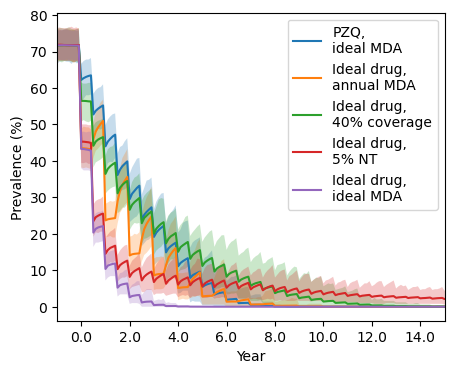

In [ ]:
import numpy as np

P1 = wormCounts[:,:,0]  * 100
P2 = wormCounts[:,:,1] * 100
P3 = wormCounts[:,:,2] * 100
P4 = wormCounts[:,:,3] * 100
P5 = wormCounts[:,:,4] * 100

plt.figure(figsize=(5,4))

plt.plot(df[:,0,0] - np.min(df[:,0,0]) ,np.mean(P1,axis=1),label  = label[0])
plt.fill_between(df[:,0,0] - np.min(df[:,0,0]) , np.percentile(P1,2.5,axis=1),
                     np.percentile(P1,97.5,axis=1), alpha=0.25)


plt.plot(df[:,0,1] - np.min(df[:,0,1]) ,np.mean(P2,axis=1), label = label[1])
plt.fill_between(df[:,0,1] - np.min(df[:,0,1]) , np.percentile(P2,2.5,axis=1),
                     np.percentile(P2,97.5,axis=1), alpha=0.25)

plt.plot(df[:,0,2] - np.min(df[:,0,2]) ,np.mean(P3,axis=1), label = label[2])
plt.fill_between(df[:,0,2] - np.min(df[:,0,2]) , np.percentile(P3,2.5,axis=1),
                     np.percentile(P3,97.5,axis=1), alpha=0.25)

plt.plot(df[:,0,3] - np.min(df[:,0,3]) ,np.mean(P4,axis=1), label = label[3])
plt.fill_between(df[:,0,3] - np.min(df[:,0,3]) , np.percentile(P4,2.5,axis=1),
                     np.percentile(P4,97.5,axis=1), alpha=0.25)

plt.plot(df[:,0,4] - np.min(df[:,0,4]) ,np.mean(P5,axis=1), label = label[4])
plt.fill_between(df[:,0,4] - np.min(df[:,0,4]) , np.percentile(P5,2.5,axis=1),
                     np.percentile(P5,97.5,axis=1), alpha=0.25)
 

plt.ylabel('Prevalence (%)')
plt.xlabel('Year')
plt.legend(ncol=1)

plt.xticks(np.linspace(1,41,21),np.linspace(0,40,21))

plt.xlim(0,16)
plt.show()      

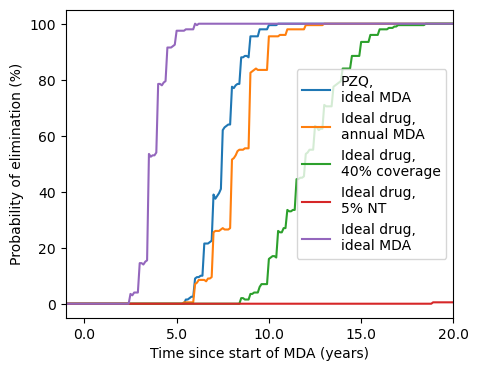

[array([11., 12., 17., 52.,  6.]), array([100. , 100. , 100. ,   0.5, 100. ])]

In [ ]:
elimination = np.zeros((np.size(wormCounts,axis=0),len(case)))
elim90Time = np.zeros(len(case))
elim20Prob = np.zeros(len(case))
plt.figure(figsize=(5,4))

elimination[:,0] = np.sum(wormCounts[:,:,0]<=0.0,axis=1)/np.size(wormCounts[:,:,0],1)
elim90Time[0] = np.ceil((np.max(np.asarray(elimination[:,0]<0.9).nonzero())+2)*(params[0]['outTimings'][1]-params[0]['outTimings'][0]))
elim20Prob[0] = elimination[np.where(df[:,0,0]==params[0]['chemoTimings'][0]+20)[0],0]
plt.plot(df[:,0,0] - np.min(df[:,0,0]) ,elimination[:,0]*100, label=label[0])

for i in range(1,len(case)):
    elimination[:,i] = np.sum(wormCounts[:,:,i]<=0.0,axis=1)/np.size(wormCounts[:,:,i],1)

    plt.plot(df[:,0,i] - np.min(df[:,0,i]) ,elimination[:,i]*100, label=label[i])

    elim90Time[i] = np.ceil((np.max(np.asarray(elimination[:,i]<0.9).nonzero())+2)*(params[i]['outTimings'][1]-params[i]['outTimings'][0]))
    elim20Prob[i] = elimination[np.where(df[:,0,i]==params[i]['chemoTimings'][0]+20)[0],i]



plt.legend()
plt.ylabel('Probability of elimination (%)')
plt.xlabel('Time since start of MDA (years)')

plt.xticks(np.linspace(1,51,11),np.linspace(0,50,11))
plt.xlim(0,21)
plt.show()

[elim90Time, elim20Prob*100]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


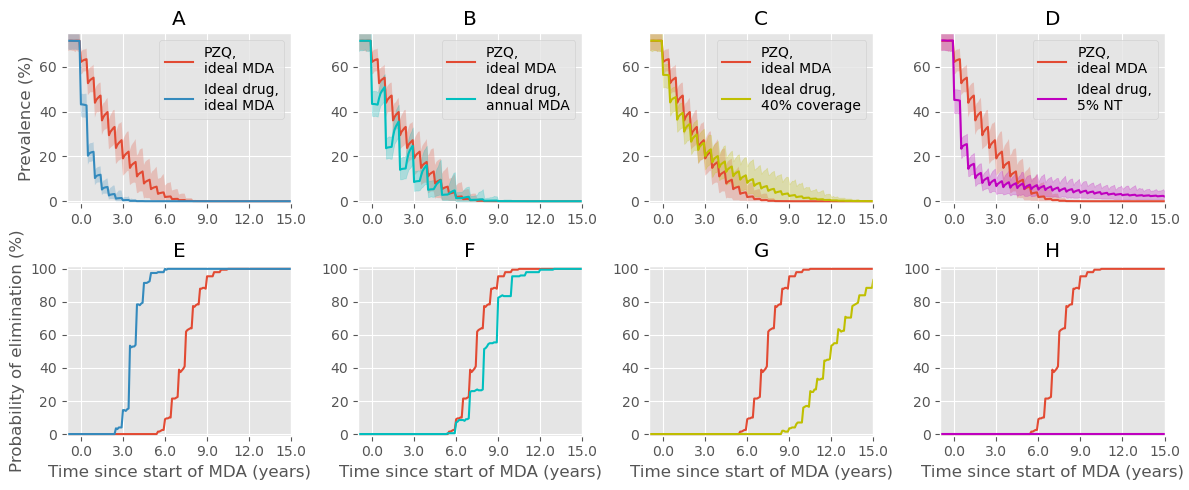

In [13]:
fig, ((ax1, ax2, ax3, ax4),(ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(12, 5))
plt.style.use('ggplot')


ax2.plot(df[:,0,0] - np.min(df[:,0,0]) ,np.mean(P1,axis=1),label  = label[0])
ax2.fill_between(df[:,0,0] - np.min(df[:,0,0]) , np.percentile(P1,2.5,axis=1),
                     np.percentile(P1,97.5,axis=1), alpha=0.25)
ax2.plot(df[:,0,1] - np.min(df[:,0,1]) ,np.mean(P2,axis=1), label = label[1],color='c')
ax2.fill_between(df[:,0,1] - np.min(df[:,0,1]) , np.percentile(P2,2.5,axis=1),
                     np.percentile(P2,97.5,axis=1), alpha=0.25,color='c')
ax2.legend(ncol=1)

ax3.plot(df[:,0,0] - np.min(df[:,0,0]) ,np.mean(P1,axis=1),label  = label[0])
ax3.fill_between(df[:,0,0] - np.min(df[:,0,0]) , np.percentile(P1,2.5,axis=1),
                     np.percentile(P1,97.5,axis=1), alpha=0.25)
ax3.plot(df[:,0,2] - np.min(df[:,0,2]) ,np.mean(P3,axis=1), label = label[2],color='y')
ax3.fill_between(df[:,0,2] - np.min(df[:,0,2]) , np.percentile(P3,2.5,axis=1),
                     np.percentile(P3,97.5,axis=1), alpha=0.25,color='y')
ax3.legend(ncol=1)

ax4.plot(df[:,0,0] - np.min(df[:,0,0]) ,np.mean(P1,axis=1),label  = label[0])
ax4.fill_between(df[:,0,0] - np.min(df[:,0,0]) , np.percentile(P1,2.5,axis=1),
                     np.percentile(P1,97.5,axis=1), alpha=0.25)
ax4.plot(df[:,0,3] - np.min(df[:,0,3]) ,np.mean(P4,axis=1), label = label[3],color='m')
ax4.fill_between(df[:,0,3] - np.min(df[:,0,3]) , np.percentile(P4,2.5,axis=1),
                     np.percentile(P4,97.5,axis=1), alpha=0.25,color='m')
ax4.legend(ncol=1)

ax1.plot(df[:,0,0] - np.min(df[:,0,0]) ,np.mean(P1,axis=1),label  = label[0])
ax1.fill_between(df[:,0,0] - np.min(df[:,0,0]) , np.percentile(P1,2.5,axis=1),
                     np.percentile(P1,97.5,axis=1), alpha=0.25)
ax1.plot(df[:,0,4] - np.min(df[:,0,4]) ,np.mean(P5,axis=1), label = label[4])
ax1.fill_between(df[:,0,4] - np.min(df[:,0,4]) , np.percentile(P5,2.5,axis=1),
                     np.percentile(P5,97.5,axis=1), alpha=0.25)
ax1.legend(ncol=1)


ax5.plot(df[:,0,0] - np.min(df[:,0,0]) ,elimination[:,0]*100, label=label[0])
ax5.plot(df[:,0,4] - np.min(df[:,0,4]) ,elimination[:,4]*100, label=label[4])
ax5.set_xlim(0,15)

ax6.plot(df[:,0,0] - np.min(df[:,0,0]) ,elimination[:,0]*100, label=label[0])
ax6.plot(df[:,0,1] - np.min(df[:,0,1]) ,elimination[:,1]*100, label=label[1],color='c')
ax6.set_xlim(0,15)

ax7.plot(df[:,0,0] - np.min(df[:,0,0]) ,elimination[:,0]*100, label=label[0])
ax7.plot(df[:,0,2] - np.min(df[:,0,2]) ,elimination[:,2]*100, label=label[2],color='y')
ax7.set_xlim(0,15)

ax8.plot(df[:,0,0] - np.min(df[:,0,0]) ,elimination[:,0]*100, label=label[0])
ax8.plot(df[:,0,3] - np.min(df[:,0,3]) ,elimination[:,3]*100, label=label[3],color='m')

ax1.set_ylabel('Prevalence (%)')
ax5.set_ylabel('Probability of elimination (%)')
# fig.supxlabel('Time since start of MDA (years)')
ax5.set_xlabel('Time since start of MDA (years)')
ax6.set_xlabel('Time since start of MDA (years)')
ax7.set_xlabel('Time since start of MDA (years)')
ax8.set_xlabel('Time since start of MDA (years)')

ax1.set_ylim(-1,75)
ax2.set_ylim(-1,75)
ax3.set_ylim(-1,75)
ax4.set_ylim(-1,75)
ax5.set_ylim(-1,102)
ax6.set_ylim(-1,102)
ax7.set_ylim(-1,102)
ax8.set_ylim(-1,102)

ax1.set_xlim(0,15)
ax2.set_xlim(0,15)
ax3.set_xlim(0,15)
ax4.set_xlim(0,15)
ax5.set_xlim(0,15)
ax6.set_xlim(0,15)
ax7.set_xlim(0,15)
ax8.set_xlim(0,15)

ax1.set_title('A')
ax2.set_title('B')
ax3.set_title('C')
ax4.set_title('D')
ax5.set_title('E')
ax6.set_title('F')
ax7.set_title('G')
ax8.set_title('H')

ax1.set_xticks(np.linspace(1,16,6),np.linspace(0,15,6))
ax2.set_xticks(np.linspace(1,16,6),np.linspace(0,15,6))
ax3.set_xticks(np.linspace(1,16,6),np.linspace(0,15,6))
ax4.set_xticks(np.linspace(1,16,6),np.linspace(0,15,6))
ax5.set_xticks(np.linspace(1,16,6),np.linspace(0,15,6))
ax6.set_xticks(np.linspace(1,16,6),np.linspace(0,15,6))
ax7.set_xticks(np.linspace(1,16,6),np.linspace(0,15,6))
ax8.set_xticks(np.linspace(1,16,6),np.linspace(0,15,6))

plt.tight_layout()

# plt.savefig('Figures/Fig6.png', bbox_inches='tight',dpi=300)
# plt.savefig('Figures/Fig6.tiff', bbox_inches='tight',dpi=300)
# plt.savefig('Figures/Fig6.eps', bbox_inches='tight',dpi=300)
